In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

import keras
from keras.preprocessing import image
from keras.applications.vgg19 import (
    VGG19, preprocess_input, decode_predictions)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load the VGG19 model
Vmodel = VGG19(
    include_top=True,
    weights='imagenet')

In [3]:
# Default Image Size for VGG19
VGG_image_size = (224, 224)

In [8]:
# Refactor above steps into reusable function
def Vpredict(image_path):
    """Use VGG19 to label image"""
    img = image.load_img(image_path, target_size=VGG_image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = Vmodel.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3)[0])

Predicted: [('n02124075', 'Egyptian_cat', 0.20090006), ('n02123045', 'tabby', 0.10446889), ('n02123159', 'tiger_cat', 0.08697472)]


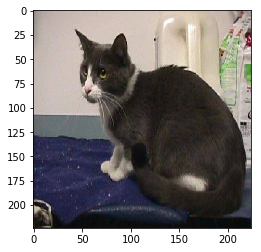

In [9]:
image_path = os.path.join("..", "Image_Data", "train", "cat.4.jpg")
Vpredict(image_path)